In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import src.mnist

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [6]:
train_set, test_set = src.mnist.get_mnist_full(validation=False)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=55000, dataset="train", labels=(55000,), images=(55000, 784), PCA=False, KMeans=False)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=10000, dataset="test", labels=(10000,), images=(10000, 784), PCA=False, KMeans=False)


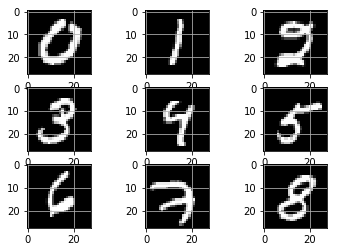

In [7]:
plt.figure(1)

for i in range(9):
    idx = np.where(train_set.labels == i)[0][0]
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.reshape(train_set.images[idx] + 123, (28, 28)), cmap='gray')
    plt.grid(True)
    
plt.show()

In [8]:
pca_train_images = train_set.PCA.transform(train_set.images)

AttributeError: 'NoneType' object has no attribute 'transform'

In [ ]:
pca_test_images = test_set.PCA.transform(test_set.images)

In [ ]:
pylab.rcParams['figure.figsize'] = (12, 12)

color_values = ['red', 'green', 'blue', 'orange', 'green', 'cyan', 'pink', 'magenta', 'yellow', 'black']
for i in range(0, 2000):
    plt.scatter(pca_train_images[i][0], pca_train_images[i][1], color=color_values[train_set.labels[i]])

plt.show()    

In [9]:
pca = PCA()
pca.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

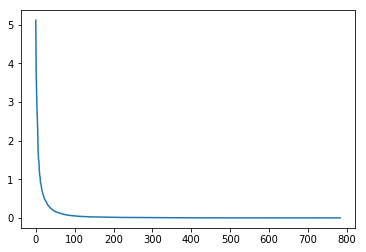

In [10]:
plt.plot(pca.explained_variance_)

In [11]:
pca3 = PCA(n_components=100)
pca3.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

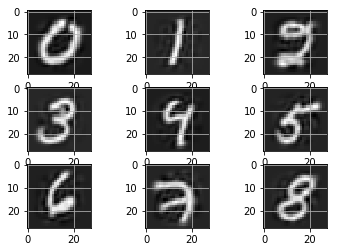

In [12]:
plt.figure(1)

for i in range(9):
    idx = np.where(train_set.labels == i)[0][0]
    transformed = pca3.transform(train_set.images[idx].reshape(1, -1))

    plt.subplot(3, 3, i + 1)
    plt.imshow(np.reshape(pca3.inverse_transform(transformed) + 123, (28, 28)), cmap='gray')
    plt.grid(True)

In [13]:
train_images_pca3 = pca3.transform(train_set.images)
test_images_pca3 = pca3.transform(test_set.images)

In [14]:
clf_gaussian = GaussianNB()
clf_gaussian.fit(train_images_pca3, train_set.labels)

GaussianNB(priors=None)

In [15]:
image_averages = clf_gaussian.theta_

Populating the interactive namespace from numpy and matplotlib


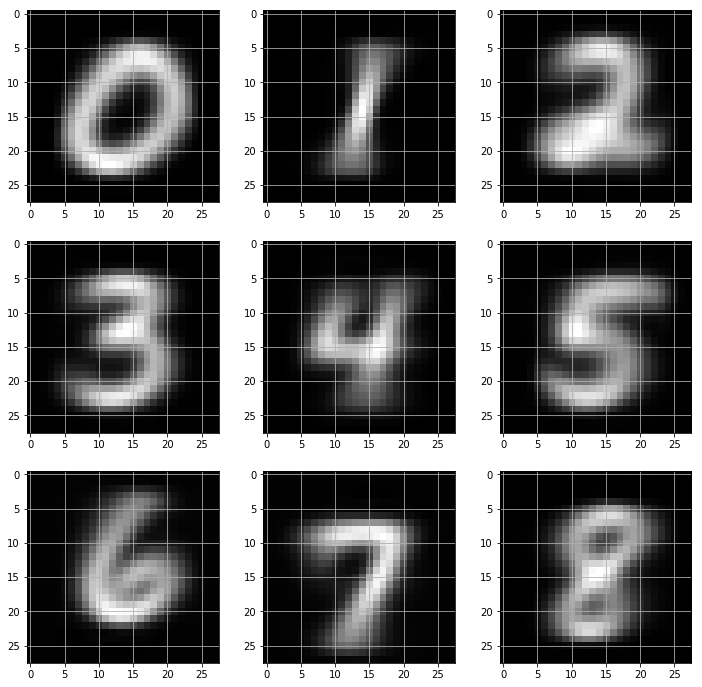

In [18]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.reshape(pca3.inverse_transform(image_averages[i]) + 123, (28, 28)), cmap='gray')
    plt.grid(True)

plt.show()

In [19]:
label_predictions = []

for i in range(0, test_images_pca3.shape[0]):
    predicted_class = clf_gaussian.predict(test_images_pca3[i].reshape(1, -1))
    label_predictions.append([test_set.labels[i], predicted_class])

In [20]:
def get_confusion_matrix(n_classes, label_predictions):
    ret = np.zeros((n_classes, n_classes))
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        ret[label, prediction] += 1
    return ret

In [21]:
def get_error_ratio(label_predictions):
    n_errors = 0
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        if label != prediction:
            n_errors += 1
    return float(n_errors) / float(len(label_predictions))


In [22]:
confusion_matrix = get_confusion_matrix(10, label_predictions)

In [23]:
np.set_printoptions(suppress=True, threshold=10000)
print(confusion_matrix)

[[  914.     0.    34.     2.     0.    15.    10.     1.     2.     2.]
 [    0.  1071.     8.    12.     3.     9.     9.     3.    19.     1.]
 [   12.     0.   877.    61.    11.     7.     7.    10.    45.     2.]
 [    4.     0.    37.   870.     1.    33.     4.    18.    27.    16.]
 [    0.     0.    31.     1.   851.     6.    11.     3.     8.    71.]
 [    3.     1.    11.    61.     5.   762.     9.     3.    29.     8.]
 [    6.     2.    37.     1.     7.    34.   870.     0.     1.     0.]
 [    4.    18.    43.     4.    23.    13.     3.   861.    13.    46.]
 [   11.     0.    27.    28.     7.    29.     5.     6.   852.     9.]
 [   11.     1.    32.     9.    43.    22.     1.    25.     9.   856.]]


In [24]:
error_ratio = get_error_ratio(label_predictions)

In [25]:
print(error_ratio)

0.1216


In [36]:
def confusion_matrix_to_latex(confusion_matrix):
    print("\[")
    print("\\begin{bmatrix}")
    
    for i in range(0, confusion_matrix.shape[0]):
        string = ""
        for j in range(0, confusion_matrix.shape[1]):
            string += str(int(confusion_matrix[i][j]))
            if j < confusion_matrix.shape[1] - 1:
                string += " & "
            else:
                string += " \\\\"
        print(string)
    
    print("\end{bmatrix}")
    print("\]")

In [37]:
confusion_matrix_to_latex(confusion_matrix)

\[
\begin{bmatrix}
914 & 0 & 34 & 2 & 0 & 15 & 10 & 1 & 2 & 2 \\
0 & 1071 & 8 & 12 & 3 & 9 & 9 & 3 & 19 & 1 \\
12 & 0 & 877 & 61 & 11 & 7 & 7 & 10 & 45 & 2 \\
4 & 0 & 37 & 870 & 1 & 33 & 4 & 18 & 27 & 16 \\
0 & 0 & 31 & 1 & 851 & 6 & 11 & 3 & 8 & 71 \\
3 & 1 & 11 & 61 & 5 & 762 & 9 & 3 & 29 & 8 \\
6 & 2 & 37 & 1 & 7 & 34 & 870 & 0 & 1 & 0 \\
4 & 18 & 43 & 4 & 23 & 13 & 3 & 861 & 13 & 46 \\
11 & 0 & 27 & 28 & 7 & 29 & 5 & 6 & 852 & 9 \\
11 & 1 & 32 & 9 & 43 & 22 & 1 & 25 & 9 & 856 \\
\end{bmatrix}
\]
